# Best fit of trigonometric function

### Irving Gómez Méndez
### February 12, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

We want to adjust the next function
$$y = B + C cos(x) + D sin(x) + E cos(2x) + F sin(2x) + G cos(3x) + H sin(3x).$$

In [2]:
points = np.array([[-4,-1],[-3,0],[-2,-1.5],[-1,0.5],[0,1],[1,-1],[2,-0.5,],[3,2],[4,-1]])

points_x = points[:,0]
points_y = points[:,1]
cos_x  = np.cos(points_x)
sin_x  = np.sin(points_x)
cos_2x = np.cos(2*points_x)
sin_2x = np.sin(2*points_x)
cos_3x = np.cos(3*points_x)
sin_3x = np.sin(3*points_x)

n = points.shape[0]
yy = points_y
XX = np.vstack([np.ones(n),cos_x,sin_x,cos_2x,sin_2x,cos_3x,sin_3x]).T
p = XX.shape[1]

# We compute the coeff.
B, C, D, E, F, G, H = np.linalg.lstsq(XX, yy, rcond=None)[0]
params  = [B, C, D, E, F, G, H]

# Calculate the SSR
SSR = np.linalg.lstsq(XX, yy, rcond=None)[1]

# We get confidence interval
alpha = 0.05
x0 = np.linspace(-4.5, 4.5, 50)
X0 = np.vstack([np.ones(len(x0)),np.cos(x0),np.sin(x0),
    np.cos(2*x0),np.sin(2*x0),np.cos(3*x0),np.sin(3*x0)]).T

aux_t_conf = np.sqrt(SSR/(n-p)*(np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array(params)
upp_conf = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_conf
low_conf = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_conf

# We get prediction interval
aux_t_pred = np.sqrt(SSR/(n-p)*(1+np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array(params)
upp_pred = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_pred
low_pred = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_pred

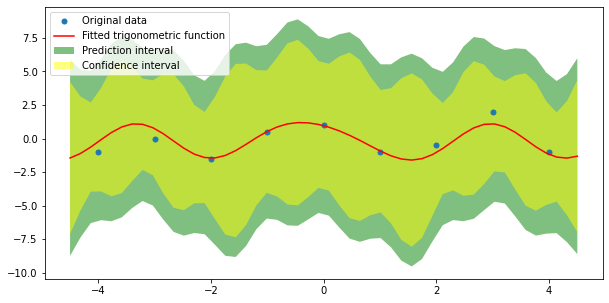

In [3]:
plt.figure(figsize=(10,5))
plt.plot(points_x, points_y, 'o', label='Original data', markersize=5)
plt.plot(x0, B+C*np.cos(x0)+D*np.sin(x0)+E*np.cos(2*x0)+F*np.sin(2*x0)+G*np.cos(3*x0)+H*np.sin(3*x0),
    'r', label='Fitted trigonometric function')
plt.fill_between(x0, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x0, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.legend(loc='upper left')
#plt.savefig('trigonometric_regression.png')